In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env
from env import get_db_url
from pydataset import data
import itertools


# Statistics 

### Applied Statistics

### Inferential = used to generalize about a population based on a sample of data. E.G. 5% of customers churned last month ---> 5% of customers will churn every month 

### Hypothesis Testing 

1. Make inferences from the sample and generalize them to the population 

2. Compares, tests and predicts future outcomes. 

3. Final result is the probability scores 

4. Draws conclusions about the population that is beyond the data available

### Steps to Hypothesis Tests 

1. Choose the right type of test for your data/question 

2. Set a desired confidence level and form hypothesis

3. Calculate the appropriate test statistics and p-value

4. Conclude based on the above statistics

Exercises

### Has the network latency gone up since we switched internet service providers? 

Is our new network latency (new_provider_ping_test) higher than our previous network latency (old_provider_ping_test)?

H0: Since changing providers, the network latency has had no significant change. 

HA: Since changing providers, the network latency has had significant change. 

Type 1 Error: Reject a true null hypothesis. 

Type 2 Error: Accept a false null hypothesis. 

### Is the Website redesign any good?

Was there an increase in user interaction (num_of_clicks) on the website after the redesign?

H0: Since the launch of the new website, the user interaction (num_of_clicks) has had no significant change. 

HA: Since the launch of the new website, the user interaction (num_of_clicks) has had significant change. 

Type 1 Error: Reject a true null hypothesis. The reality being the user interaction, based on number of clicks, after the website redesign is higher than before the redesign but falsely rejecting it

Type II Error: Accept a false null hypothesis. The reality being the user interaction after the redesign is not higher than the interaction before the redesign but not rejecting the null hypothesis 

### Is our television ad driving more sales? 

Do we see a spike in sales after our tv add? 

H0: The sales data remained the same after the tv ad. 

HA: The sales data had a significant change after the tv ad. 

Type I Error: Reject a true null hypothesis. 

Type II Error: Accept a false null hypothesis

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



<function matplotlib.pyplot.legend(*args, **kwargs)>

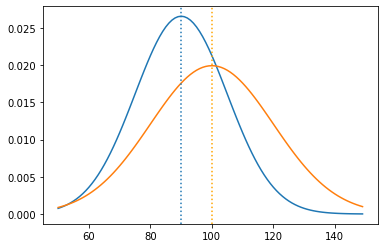

In [142]:
#Visualize distributions 

x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color = 'orange')

plt.legend

In [5]:
#H0: The average time it takes to sell a home is the same for both offices 
#HA: The average time it takes to sell a home is not the same for both offices 
mean1 =90
std1 =15
count1= 40

mean2=100
std2=20
count2=50

alpha = 0.05


In [6]:
#Calculate the t stat and p value 
t, p = stats.ttest_ind_from_stats(mean1, std1, count1, mean2, std2, count2, equal_var=True)

In [71]:
t, p

(4.652577547151351, 0.0)

In [72]:
if p  > alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


We reject the null hypothesis

In [ ]:
# Load the mpg dataset and use it to answer the following questions:

In [81]:
from pydataset import data
mpg = data('mpg')
mpg['avg_mpg'] = stats.hmean(mpg[{'cty', 'hwy'}], axis=1)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


In [ ]:
#Is there a difference in fuel-efficiency in cars from 2008 vs 1999? 

In [ ]:
#H0: There is no difference in the fuel-efficiency in cars from 1999 to 2008 
#HA: There is a difference in the fuel-efficiency in cars from 1999 to 2008 

In [82]:
#Create two sets 
avg_99 = mpg[mpg.year == 1999].avg_mpg
avg_08 = mpg[mpg.year == 2008].avg_mpg
avg_99.mean(), avg_08.mean()

(19.68238764869729, 19.488662986569054)

In [83]:
avg_99.var(), avg_08.var()
#the variance is very minimal so I will set equal_var = True

(25.850396545865912, 22.550836772260343)

In [85]:
t, p = stats.ttest_ind(avg_08, avg_99, equal_var = True)
t, p, alpha

(-0.3011962975077886, 0.7635345888327115, 0.05)

In [87]:
if p > alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


We fail to reject the null hypothesis. 

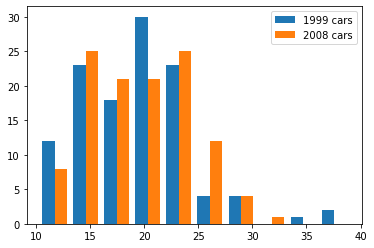

In [143]:
plt.hist([avg_99, avg_08], label=['1999 cars', '2008 cars'])
plt.legend(loc="upper right")

#Are compact cars more fuel-efficient than the average car? 

H0: Compact cars are more fuel-efficient

HA: Compact cars are not more fuel-efficient

In [144]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,22.212766


In [34]:
#calculate the t and p values 
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p 

(7.512360093161354, 1.5617666348807727e-09)

In [145]:
if (p/2 < alpha) and t > 0:
    print('Reject null')

### Do manual cars get better gas mileage than automatic cars?

In [146]:
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,22.212766


In [38]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

H0: Manual cars get better gas mileage than automatic cars. 

HA: Manual cars do not get better gas mileage than automatic cars. 

In [39]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [40]:
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [41]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [42]:
fe_manual.mean(), fe_auto.mean()

(21.629228592155194, 18.583199507835747)

In [44]:
import numpy as np

In [45]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'),'Auto Transmission', 'Manual Transmission') 

In [46]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,avg_fe,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.0,22.212766,Auto Transmission
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.0,24.360000,Manual Transmission
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,31.0,24.313725,Manual Transmission
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,30.0,24.705882,Auto Transmission
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,26.0,19.809524,Auto Transmission
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,28.0,22.638298,Auto Transmission
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,29.0,24.360000,Manual Transmission
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,26.0,19.809524,Auto Transmission
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,26.0,21.272727,Manual Transmission


Text(0.5, 1.0, 'Manual transmission gets better fuel effiency')

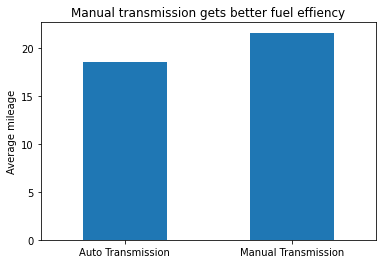

In [47]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission gets better fuel effiency')

# Correlation 

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?


In [203]:
tc = pd.read_csv('telco_churn.csv')

In [204]:
tc.head(3)

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.9,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic


In [207]:
#Reduce number of columns 
tc = tc[["customer_id", "monthly_charges", "tenure", "total_charges", "phone_service", "internet_service_type"]]

#Does tenure correlate with monthly charges? 
H0: There is no linear relationship between tenure and monthly charges 
HA: There is a linear relationship between tenure and monthly charges 

In [54]:
#identify the series to work with 
x = df.tenure
y = df.monthly_charges

r, p = stats.pearsonr(x,y)
print('r=', r)
print('p=', p)

r= 0.24718489224989926
p= 1.2811368994964528e-98


In [89]:
if p > alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


There is a moderate positive linear relationship between monthly charges and tenure

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

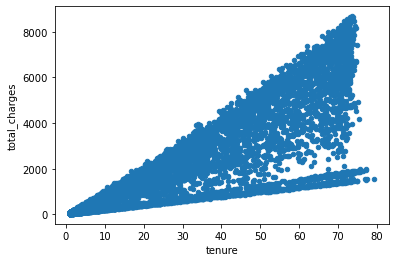

In [88]:
#Does tenure correlate with total charges? 
#H0: There is a linear relationship between tenure and monthly charges 
#HA: There is no linear relationship between tenure and monthly charges 
df.plot.scatter(y= 'total_charges', x= 'tenure')


In [57]:
df.dropna(inplace=True)

In [58]:
x = df.tenure 
y2 = df.total_charges
r, p = stats.pearsonr(x,y2)
print('r=', r)
print('p=', p)

r= 0.8258191824783676
p= 0.0


There is a strong positive linear relationship between total charges and tenure

What happens if you control for phone service? 
Plot the three types of phone service against monthly charges 

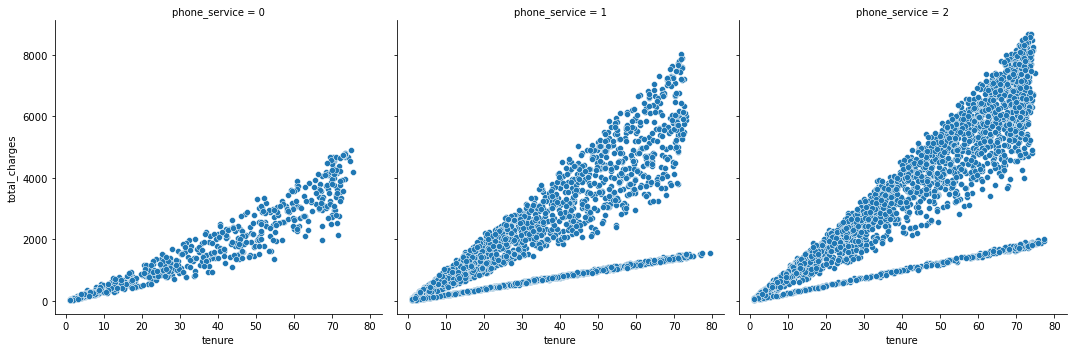

In [93]:
sns.relplot(data=df, y='total_charges', x='tenure', col = "phone_service")

In [209]:
tc["one_line"] = tc.phone_service == 1
tc["two_lines"] = tc.phone_service == 2
tc["no_line"] = tc.phone_service == 0

/var/folders/lt/mq77_h29005b8q_dkwt9pz000000gn/T/ipykernel_75784/2289786469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc["one_line"] = tc.phone_service == 1
/var/folders/lt/mq77_h29005b8q_dkwt9pz000000gn/T/ipykernel_75784/2289786469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tc["two_lines"] = tc.phone_service == 2
/var/folders/lt/mq77_h29005b8q_dkwt9pz000000gn/T/ipykernel_75784/2289786469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

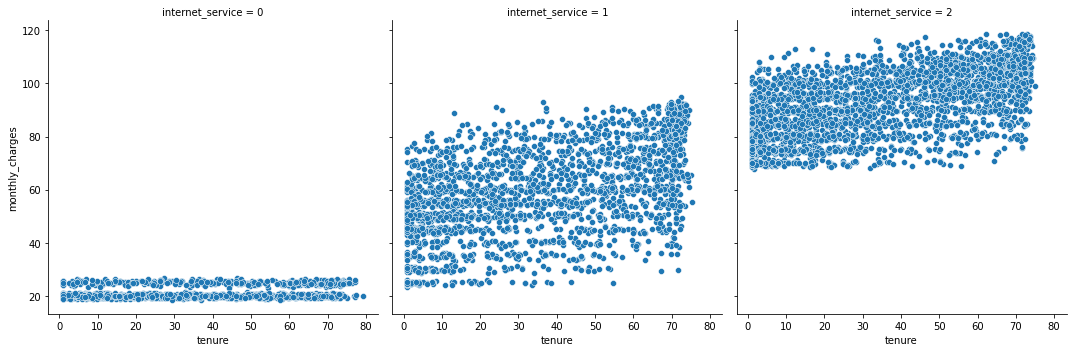

In [63]:
sns.relplot(data=df, y='monthly_charges', x='tenure', col = "internet_service")

# CHI Square 

### Exercise 1

In [120]:
index = ["Uses Macbook", "Doesn't Macbook"]
columns = ["Codeup Student", "Not Codeup Student"]

observed = pd.DataFrame([[49,20], [1,30]], index=index, columns=columns)
observed

,Codeup Student,Not Codeup Student
Uses Macbook,49,20
Doesn't Macbook,1,30


In [123]:
a = 0.05 

In [121]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.4116760526193828e-09

In [124]:
if p < a: 
    print("Reject the null hypothesis")
else: 
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


### Exercise 2 (simple version)

In [178]:
df = data("mpg")

#Rename class 
df = df.rename(columns={"class": "vehicle_type"})

#Specify automatic 
df["is_automatic"] = df.trans.str.startswith("a")
df.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_type,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True


In [128]:
#Are manufacturer and model independent of one another? 
observed = pd.crosstab(df.manufacturer, df.model)
chi2, p , degf, expected = stats.chi2_contingency(observed)
p

0.0

### Exercise 2 with Automation 

In [180]:
categorical_columns = ['manufacturer', 'model', 'drv', 'fl', 'vehicle_type', 'is_automatic']
categorical_columns

['manufacturer', 'model', 'drv', 'fl', 'vehicle_type', 'is_automatic']

In [183]:
combinations = list(itertools.combinations(categorical_columns, 2))
combinations

[('manufacturer', 'model'),
 ('manufacturer', 'drv'),
 ('manufacturer', 'fl'),
 ('manufacturer', 'vehicle_type'),
 ('manufacturer', 'is_automatic'),
 ('model', 'drv'),
 ('model', 'fl'),
 ('model', 'vehicle_type'),
 ('model', 'is_automatic'),
 ('drv', 'fl'),
 ('drv', 'vehicle_type'),
 ('drv', 'is_automatic'),
 ('fl', 'vehicle_type'),
 ('fl', 'is_automatic'),
 ('vehicle_type', 'is_automatic')]

In [185]:
alpha = 0.05 
outcomes = []
for combination in combinations: 
    outcome = {}
    outcome["column1"] = combination[0]
    outcome["column2"] = combination[1]
    observed = pd.crosstab (df[combination[0]], df[combination[1]])
    
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    outcome["p"] = p 
    
    if p < alpha: 
        outcome["reject_null"] = True 
    else: 
        outcome["reject_null"] = False
        
    outcomes.append(outcome)

pd.DataFrame(outcomes)

,column1,column2,p,reject_null
0,manufacturer,model,0.000000e+00,True
1,manufacturer,drv,5.128094e-34,True
2,manufacturer,fl,1.062455e-13,True
3,manufacturer,vehicle_type,5.267718e-54,True
4,manufacturer,is_automatic,9.534443e-03,True
5,model,drv,1.473953e-58,True
6,model,fl,1.854690e-07,True
7,model,vehicle_type,9.146376e-164,True
8,model,is_automatic,5.171909e-02,False
9,drv,fl,5.845580e-01,False


# Exercise 3 

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Is an employee's gender independent of whether or not they are or have been a manager?

In [135]:
sql = '''
SELECT gender, dept_name 
FROM employees 
JOIN dept_emp using(emp_no)
JOIN departments using(dept_no)
WHERE to_date > curdate()
AND dept_name IN ('Sales', 'Marketing')
'''

url = get_db_url("employees")

df = pd.read_sql(sql, url)
df.head()

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing


In [131]:
df.gender.value_counts()

M    144114
F     96010
Name: gender, dtype: int64

In [132]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,7007,24533,5014,5147,5864,21393,5872,6181,14999
M,10562,36853,7423,7751,8978,31911,8674,9260,22702


In [186]:
p

7.4513729838250925e-06

In [190]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < a:
    print("Reject the null")
else: 
    print("Fail to reject the null")

Reject the null


### Exercise 3 Part 2 

Is an employee's gender independent of whether or not they are or have been a manager?

In [191]:
sql = '''
SELECT gender, title 
FROM employees
JOIN titles using(emp_no)
'''

In [192]:
df = pd.read_sql(sql, url)
df.head()

,gender,title
0,M,Senior Engineer
1,F,Staff
2,M,Senior Engineer
3,M,Engineer
4,M,Senior Engineer


In [139]:
df["is_manager"] = df.title == "Manager"
df.head()

,gender,title,is_manager
0,M,Senior Engineer,False
1,F,Staff,False
2,M,Senior Engineer,False
3,M,Engineer,False
4,M,Senior Engineer,False


In [193]:
observed = pd.crosstab(df.gender, df.is_manager)
observed

AttributeError: 'DataFrame' object has no attribute 'is_manager'

In [194]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

7.4513729838250925e-06

In [195]:
if p < alpha: 
    print("Reject the null")
else: 
    print("Fail to reject the null")

Reject the null


In [ ]:
df["one_line"] = df.phone_service == 1
df["two_lines"] = df.phone_service == 2
df["no_line"] = df.phone_service == 0